In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2023-11-07_Hao_2pt5and5percent.txt',sep='\t')
#df = df.iloc[:,:-15]
print(df.columns)
df = df[df['Protein'].str.contains('contaminant') == False]

Index(['Protein', 'Group ID', 'Collapsed?', 'Unique Peptides',
       'Razor Peptides', 'Gene', 'Description', 'SeqLen', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30'],
      dtype='object')


In [3]:
df1 = df[['Protein', 'Group ID', 'Unique Peptides', 'Razor Peptides', 'Gene',
       'Description', 'SeqLen', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15']]
df2 = df[['Protein', 'Group ID', 'Unique Peptides', 'Razor Peptides', 'Gene',
       'Description', 'SeqLen', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30']]
proteasome_subunits = ['RPN'+str(i) for i in range(1,14)] + ['RPT'+str(i) for i in range(1,7)] + ['SEM1'] + ['PRE'+str(i) for i in range(1,11)] + ['PUP'+str(i) for i in [1,2,3]]
df1['color'] = 'grey'
df2['color'] = 'grey'
df1.loc[df1['Gene'].isin(proteasome_subunits), 'color'] = 'cyan'
df1.loc[df1['Gene'] == 'RPS31', 'color'] = 'yellow'
df1.loc[df2['Gene'].isin(['CDC48','NPL4','UFD1']), 'color'] = 'orange'
df2.loc[df2['Gene'].isin(['CDC48','NPL4','UFD1']), 'color'] = 'cyan'
df2.loc[df2['Gene'] == 'RPS31', 'color'] = 'yellow'

<ipython-input-3-1d54bc420759>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['color'] = 'grey'
<ipython-input-3-1d54bc420759>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['color'] = 'grey'


In [4]:
P = df1[df1['Gene'].isin(proteasome_subunits)].iloc[:,-16:-1]
ratios = P.div(P['1'],axis=0)
normalize = ratios.mean(axis=0)
#normalized_df = df.iloc[:,-16:-1]/normalize
#normalized_df = df.iloc[:,-15:]

In [5]:
Q = df2[df2['Gene'].isin(['CDC48','NPL4','UFD1'])].iloc[:,-16:-1]
ratios = Q.div(Q['16'],axis=0)
normalize1 = ratios.mean(axis=0)


In [6]:
normalized_df1 = df1.iloc[:,-16:-1]/normalize
normalized_df1 += 0.1
normalized_df1['2-1 ratio'] = np.nan
normalized_df1['2-1 p'] = np.nan
normalized_df1['3-2 ratio'] = np.nan
normalized_df1['3-2 p'] = np.nan
normalized_df1['4-2 ratio'] = np.nan
normalized_df1['4-2 p'] = np.nan
normalized_df1['5-2 ratio'] = np.nan
normalized_df1['5-2 p'] = np.nan

for i in range(normalized_df1.shape[0]):
    normalized_df1.iloc[i,16] = ttest_ind(normalized_df1.iloc[i,3:6],normalized_df1.iloc[i,0:3],equal_var=False).pvalue
    normalized_df1.iloc[i,15] = normalized_df1.iloc[i,3:6].mean() / normalized_df1.iloc[i,0:3].mean()
    normalized_df1.iloc[i,18] = ttest_ind(normalized_df1.iloc[i,6:9],normalized_df1.iloc[i,3:6],equal_var=False).pvalue
    normalized_df1.iloc[i,17] = normalized_df1.iloc[i,6:9].mean() / normalized_df1.iloc[i,3:6].mean()
    normalized_df1.iloc[i,20] = ttest_ind(normalized_df1.iloc[i,9:12],normalized_df1.iloc[i,3:6],equal_var=False).pvalue
    normalized_df1.iloc[i,19] = normalized_df1.iloc[i,9:12].mean() / normalized_df1.iloc[i,3:6].mean()
    normalized_df1.iloc[i,22] = ttest_ind(normalized_df1.iloc[i,12:15],normalized_df1.iloc[i,3:6],equal_var=False).pvalue
    normalized_df1.iloc[i,21] = normalized_df1.iloc[i,12:15].mean() / normalized_df1.iloc[i,3:6].mean()
result1 = pd.concat([df1[['Protein', 'Group ID', 'Unique Peptides', 'Razor Peptides', 'Gene', 'Description', 'SeqLen', 'color']],normalized_df1],axis=1)
result11 = result1[(result1['color']!='yellow') & (result1['color']!='cyan') & (result1['color']!='orange')]
result12 = result1[(result1['color']=='yellow') | (result1['color']=='cyan') | (result1['color']=='orange')]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
normalized_df2 = df2.iloc[:,-16:-1]/normalize1
normalized_df2 += 0.1
normalized_df2['2-1 ratio'] = np.nan
normalized_df2['2-1 p'] = np.nan
normalized_df2['3-2 ratio'] = np.nan
normalized_df2['3-2 p'] = np.nan
normalized_df2['4-2 ratio'] = np.nan
normalized_df2['4-2 p'] = np.nan
normalized_df2['5-2 ratio'] = np.nan
normalized_df2['5-2 p'] = np.nan

for i in range(normalized_df2.shape[0]):
    normalized_df2.iloc[i,16] = ttest_ind(normalized_df2.iloc[i,3:6],normalized_df2.iloc[i,0:3],equal_var=False).pvalue
    normalized_df2.iloc[i,15] = normalized_df2.iloc[i,3:6].mean() / normalized_df2.iloc[i,0:3].mean()
    normalized_df2.iloc[i,18] = ttest_ind(normalized_df2.iloc[i,6:9],normalized_df2.iloc[i,3:6],equal_var=False).pvalue
    normalized_df2.iloc[i,17] = normalized_df2.iloc[i,6:9].mean() / normalized_df2.iloc[i,3:6].mean()
    normalized_df2.iloc[i,20] = ttest_ind(normalized_df2.iloc[i,9:12],normalized_df2.iloc[i,3:6],equal_var=False).pvalue
    normalized_df2.iloc[i,19] = normalized_df2.iloc[i,9:12].mean() / normalized_df2.iloc[i,3:6].mean()
    normalized_df2.iloc[i,22] = ttest_ind(normalized_df2.iloc[i,12:15],normalized_df2.iloc[i,3:6],equal_var=False).pvalue
    normalized_df2.iloc[i,21] = normalized_df2.iloc[i,12:15].mean() / normalized_df2.iloc[i,3:6].mean()
result2 = pd.concat([df2[['Protein', 'Group ID', 'Unique Peptides', 'Razor Peptides', 'Gene', 'Description', 'SeqLen', 'color']],normalized_df2],axis=1)
result21 = result2[(result2['color']!='green') & (result2['color']!='cyan')]
result22 = result2[(result2['color']=='green') | (result2['color']=='cyan')]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
s1 = result11[(result11['2-1 ratio']>1.5)]['Gene'].tolist()
s2 = result11[(result11['3-2 ratio']>1.5)]['Gene'].tolist()
s3 = result11[(result11['4-2 ratio']<2/3)]['Gene'].tolist()
s4 = result11[(result11['5-2 ratio']<2/3)]['Gene'].tolist()

s5 = result21[(result21['2-1 ratio']>1.5)]['Gene'].tolist()
s6 = result21[(result21['3-2 ratio']<2/3)]['Gene'].tolist()
s7 = result21[(result21['4-2 ratio']>1.5)]['Gene'].tolist()
s8 = result21[(result21['5-2 ratio']<2/3)]['Gene'].tolist()

print(len(s1))
print(len(s5))
print(len(list(set(s1).intersection(s5))))

print(len(s2))
print(len(s6))
print(len(list(set(s2).intersection(s6))))

print(len(s3))
print(len(s7))
print(len(list(set(s3).intersection(s7))))

print(len(s4))
print(len(s8))
print(len(list(set(s4).intersection(s8))))

841
429
198
285
544
36
1296
440
330
768
344
157


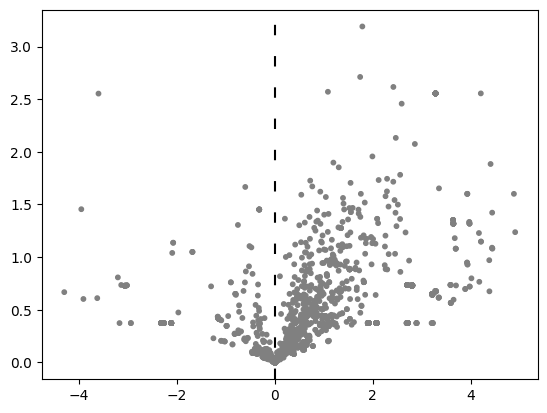

In [8]:
plt.figure(0)

#result1.loc[result1['Gene'].isin(['CDC48','NPL4','UFD1']), 'color'] = 'orange'
#result11 = result1[(result1['color']!='yellow') & (result1['color']!='cyan') & (result1['color']!='oragne')]
#result12 = result1[(result1['color']=='yellow') | (result1['color']=='cyan') | (result1['color']=='orange')]

#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
#plt.axvline(x=np.log2(1.5),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['2-1 ratio']>2) & (result1['2-1 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result11['2-1 ratio']), -np.log10(result11['2-1 p']), color=result11['color'],s=10)
#plt.scatter(np.log2(result12['2-1 ratio']), -np.log10(result12['2-1 p']), color=result12['color'],s=30)


plt.savefig('figure1.svg',transparent=True, format='svg')
#plt.show()

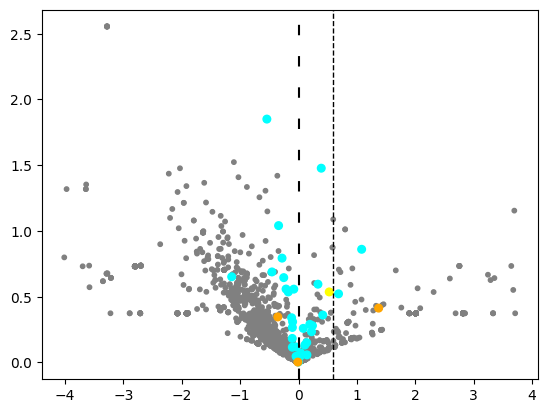

In [ ]:
plt.figure(1)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(1.5),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['3-2 ratio']>2) & (result1['3-2 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result11['3-2 ratio']), -np.log10(result11['3-2 p']), color=result11['color'],s=10)
plt.scatter(np.log2(result12['3-2 ratio']), -np.log10(result12['3-2 p']), color=result12['color'],s=30)


plt.savefig('figure2.svg',transparent=True, format='svg')
#plt.show()

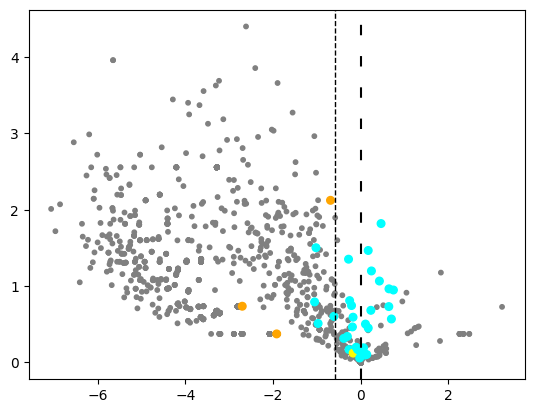

In [ ]:
plt.figure(2)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(2/3),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['3-2 ratio']>2) & (result1['3-2 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result11['4-2 ratio']), -np.log10(result11['4-2 p']), color=result11['color'],s=10)
plt.scatter(np.log2(result12['4-2 ratio']), -np.log10(result12['4-2 p']), color=result12['color'],s=30)


plt.savefig('figure3.svg',transparent=True, format='svg')
#plt.show()

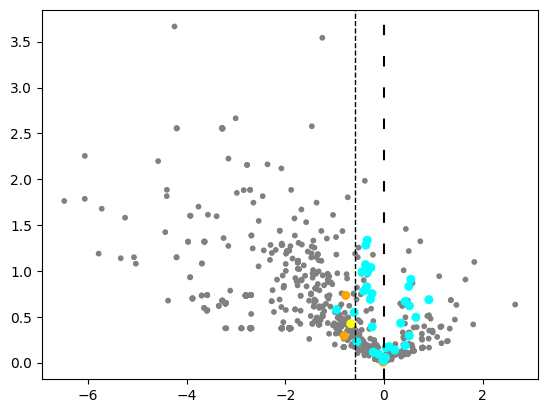

In [ ]:
plt.figure(3)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(2/3),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
result111 = result11[(result11['2-1 ratio']>1.5)]
plt.scatter(np.log2(result111['5-2 ratio']), -np.log10(result111['5-2 p']), color=result111['color'],s=10)
plt.scatter(np.log2(result12['5-2 ratio']), -np.log10(result12['5-2 p']), color=result12['color'],s=30)


plt.savefig('figure4.svg',transparent=True, format='svg')
#plt.show()

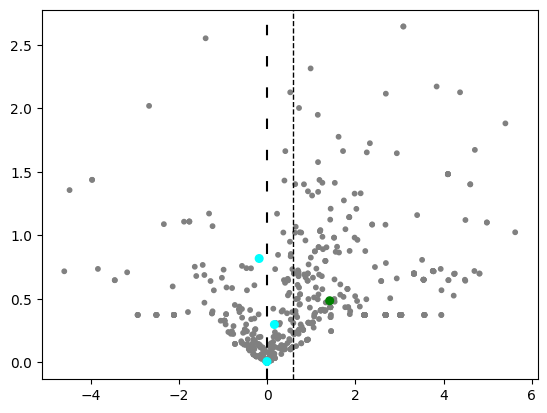

In [ ]:
plt.figure(4)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(1.5),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['2-1 ratio']>2) & (result1['2-1 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result21['2-1 ratio']), -np.log10(result21['2-1 p']), color=result21['color'],s=10)
plt.scatter(np.log2(result22['2-1 ratio']), -np.log10(result22['2-1 p']), color=result22['color'],s=30)


plt.savefig('figure5.svg',transparent=True, format='svg')
#plt.show()

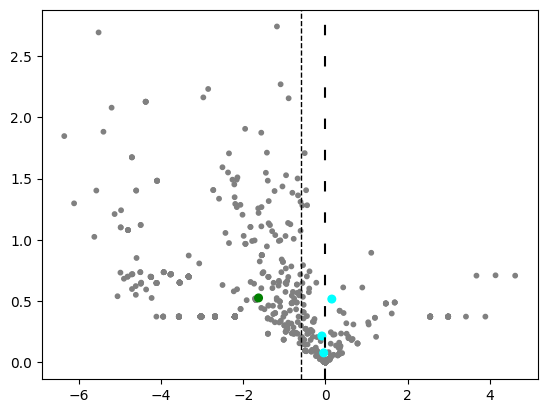

In [ ]:
plt.figure(5)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(2/3),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['2-1 ratio']>2) & (result1['2-1 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result21['3-2 ratio']), -np.log10(result21['3-2 p']), color=result21['color'],s=10)
plt.scatter(np.log2(result22['3-2 ratio']), -np.log10(result22['3-2 p']), color=result22['color'],s=30)


plt.savefig('figure6.svg',transparent=True, format='svg')
#plt.show()

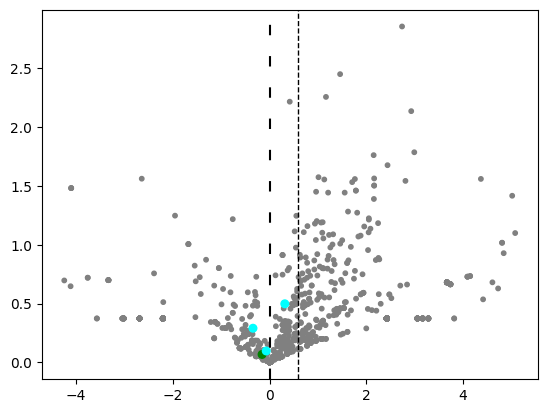

In [ ]:
plt.figure(6)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(1.5),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['2-1 ratio']>2) & (result1['2-1 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result21['4-2 ratio']), -np.log10(result21['4-2 p']), color=result21['color'],s=10)
plt.scatter(np.log2(result22['4-2 ratio']), -np.log10(result22['4-2 p']), color=result22['color'],s=30)


plt.savefig('figure7.svg',transparent=True, format='svg')
#plt.show()

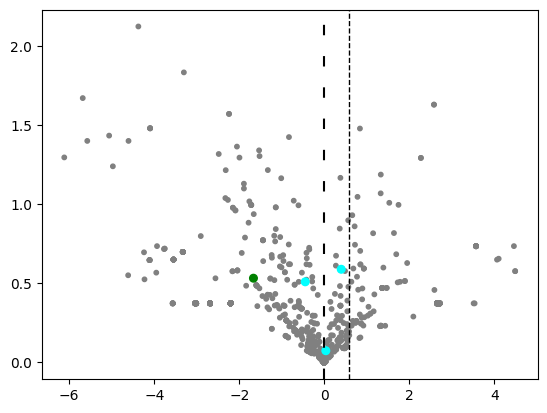

In [ ]:
plt.figure(7)
#plt.axhline(y=-np.log10(0.05),c='black',linestyle='--',linewidth=1)
plt.axvline(x=np.log2(1.5),c='black',linestyle='--',linewidth=1)
plt.axvline(x=0,c='black',linestyle=(0,(5,10)))
#result1.loc[(result1['2-1 ratio']>2) & (result1['2-1 p']<0.05), 'color'] = 'red'
plt.scatter(np.log2(result21['5-2 ratio']), -np.log10(result21['5-2 p']), color=result21['color'],s=10)
plt.scatter(np.log2(result22['5-2 ratio']), -np.log10(result22['5-2 p']), color=result22['color'],s=30)


plt.savefig('figure8.svg',transparent=True, format='svg')
#plt.show()

In [ ]:
result_ubx5 = result11[(result11['34-2 ratio']<0.5) & (result11['34-2 p']<0.05)]
result11.to_csv('Up_cdc48-3.txt',sep='\t')
result_ubx5.to_csv('Down_ubx5.txt',sep='\t')

In [ ]:
result11 = result1[(result1['color']!='yellow') & (result1['color']!='cyan')]
result12 = result1[(result1['color']=='yellow') | (result1['color']=='cyan')]

s1 = result11[(result11['2-1 ratio']>1.5)]
s2 = result11[(result11['3-2 ratio']>1.5)]
s3 = result11[(result11['4-2 ratio']<2/3)]
s4 = result11[(result11['5-2 ratio']<2/3)]

s5 = result21[(result21['2-1 ratio']>1.5)]
s6 = result21[(result21['3-2 ratio']<2/3)]
s7 = result21[(result21['4-2 ratio']>1.5)]
s8 = result21[(result21['5-2 ratio']<2/3)]

s9 = s7[s7['Gene'].isin(s3['Gene'].tolist())]
s10 = s3[s3['Gene'].isin(s7['Gene'].tolist())]

In [ ]:
s9.to_csv('TableS21.csv')
s10.to_csv('TableS22.csv')

In [ ]:
s9

,Protein,Group ID,Unique Peptides,Razor Peptides,Gene,Description,SeqLen,color,16,17,...,29,30,2-1 ratio,2-1 p,3-2 ratio,3-2 p,4-2 ratio,4-2 p,5-2 ratio,5-2 p
2,sp|O13516|RS9A_YEAST,1232,0,73,RPS9A,40S ribosomal protein S9-A OS=Saccharomyces ce...,197,grey,2.1,0.100000,...,1.689173,0.100000,2.127178,0.406634,0.037985,0.191497,1.772685,0.493638,0.872995,0.873570
20,sp|P00427|COX6_YEAST,431,17,0,COX6,"Cytochrome c oxidase subunit 6, mitochondrial ...",148,grey,0.1,0.100000,...,0.100000,0.100000,4.612070,0.422650,0.216822,0.422650,3.832321,0.255798,0.216822,0.422650
22,sp|P00445|SODC_YEAST,965,17,0,SOD1,Superoxide dismutase [Cu-Zn] OS=Saccharomyces ...,154,grey,0.1,0.100000,...,0.100000,0.100000,1.000000,1.000000,1.000000,1.000000,5.356436,0.422650,1.000000,1.000000
23,sp|P00447|SODM_YEAST,189,26,0,SOD2,"Superoxide dismutase [Mn], mitochondrial OS=Sa...",233,grey,0.1,0.100000,...,0.100000,0.100000,4.612070,0.422650,0.216822,0.422650,4.776893,0.262793,0.216822,0.422650
26,sp|P00549|KPYK1_YEAST,110,466,0,CDC19,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...,500,grey,15.1,12.073725,...,28.705115,15.706654,1.097889,0.688590,0.642265,0.283433,1.553520,0.128262,1.400948,0.263785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,sp|Q12486|YOR31_YEAST,958,5,0,YOR131C,Uncharacterized hydrolase YOR131C OS=Saccharom...,218,grey,0.1,0.100000,...,0.100000,0.100000,1.000000,1.000000,1.000000,1.000000,5.356436,0.422650,1.000000,1.000000
1793,sp|Q12496|YO098_YEAST,1182,21,0,YOL098C,Uncharacterized protein YOL098C OS=Saccharomyc...,1037,grey,0.1,0.100000,...,0.100000,0.100000,8.078664,0.422650,0.123783,0.422650,1.567138,0.655706,0.123783,0.422650
1807,sp|Q12680|GLT1_YEAST,654,56,0,GLT1,Glutamate synthase [NADH] OS=Saccharomyces cer...,2145,grey,1.1,0.100000,...,1.689173,0.100000,0.230769,0.422650,1.000000,1.000000,5.356436,0.422650,6.297243,0.422650
1817,sp|Q3E824|YO020_YEAST,1696,10,0,YOR020W-A,Uncharacterized protein YOR020W-A OS=Saccharom...,90,grey,0.1,0.100000,...,0.100000,0.100000,4.612070,0.422650,0.216822,0.422650,2.887748,0.344884,0.216822,0.422650


In [ ]:
s10

,Protein,Group ID,Unique Peptides,Razor Peptides,Gene,Description,SeqLen,color,1,2,...,14,15,2-1 ratio,2-1 p,3-2 ratio,3-2 p,4-2 ratio,4-2 p,5-2 ratio,5-2 p
2,sp|O13516|RS9A_YEAST,1232,0,73,RPS9A,40S ribosomal protein S9-A OS=Saccharomyces ce...,197,grey,3.1,3.507595,...,6.625423,2.885853,1.366740,0.235822,0.687717,0.526816,0.096683,0.014781,0.792629,0.509571
20,sp|P00427|COX6_YEAST,431,17,0,COX6,"Cytochrome c oxidase subunit 6, mitochondrial ...",148,grey,1.1,0.100000,...,0.100000,1.492926,2.930428,0.037324,0.288264,0.083245,0.040950,0.024070,0.231085,0.036485
22,sp|P00445|SODC_YEAST,965,17,0,SOD1,Superoxide dismutase [Cu-Zn] OS=Saccharomyces ...,154,grey,2.1,0.100000,...,0.915678,1.492926,1.821860,0.363693,0.459355,0.275283,0.047048,0.108257,0.841155,0.739976
23,sp|P00447|SODM_YEAST,189,26,0,SOD2,"Superoxide dismutase [Mn], mitochondrial OS=Sa...",233,grey,1.1,1.235865,...,1.731356,2.885853,1.514946,0.227500,0.653782,0.168272,0.040950,0.024070,1.033607,0.887140
26,sp|P00549|KPYK1_YEAST,110,466,0,CDC19,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...,500,grey,27.1,14.866244,...,26.201691,25.172674,0.968395,0.897507,0.979404,0.952977,0.557726,0.065386,1.208375,0.265855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,sp|Q12486|YOR31_YEAST,958,5,0,YOR131C,Uncharacterized hydrolase YOR131C OS=Saccharom...,218,grey,0.1,0.100000,...,0.915678,0.100000,0.755137,0.815276,1.064648,0.955419,0.264858,0.422650,0.984986,0.989059
1793,sp|Q12496|YO098_YEAST,1182,21,0,YOL098C,Uncharacterized protein YOL098C OS=Saccharomyc...,1037,grey,2.1,0.100000,...,1.731356,1.492926,1.381571,0.530411,0.604259,0.559735,0.046201,0.037791,0.511955,0.185256
1807,sp|Q12680|GLT1_YEAST,654,56,0,GLT1,Glutamate synthase [NADH] OS=Saccharomyces cer...,2145,grey,3.1,0.100000,...,7.441101,2.885853,2.467106,0.077651,1.429447,0.718910,0.021334,0.006357,0.741480,0.630098
1817,sp|Q3E824|YO020_YEAST,1696,10,0,YOR020W-A,Uncharacterized protein YOR020W-A OS=Saccharom...,90,grey,1.1,0.100000,...,0.100000,1.492926,1.165972,0.746090,0.413706,0.197526,0.102920,0.002787,0.580784,0.473192


In [ ]:
import requests
import sys
import re
p = 'P00427'
def sequence(p):
  url = 'https://rest.uniprot.org/uniprotkb/stream?format=txt&query=accession%3A{}'.format(p)
  r = requests.get(url, allow_redirects=True)
  con = r.content.decode('utf-8').split('\n')
  t = [line for line in con if line.startswith('CC  ')]
  func = 'NA'
  loc = 'NA'
  # try:
  #   function = [x for x in ' '.join(t).split('CC   -!- ') if 'FUNCTION:' in x][0]
  #   function = re.sub("\{.*?\}","",function)
  #   func = re.sub("CC       ","",function)
  # except:
  #   pass
  try:
    localization = [x for x in t if 'SUBCELLULAR LOCATION:' in x][0]
    localization = localization[len('CC   -!- SUBCELLULAR LOCATION: '):]
    loc = re.sub("\{.*?\}","",localization)
  except:
    pass
  return loc
sequence(p)

'Mitochondrion inner membrane'

In [ ]:
s9 = s7[s7['Gene'].isin(result11[(result11['4-2 ratio']<2/3)]['Gene'].tolist())]
#s9 = s9.iloc[:2]
l = s9['Protein'].tolist()

l1 = [e.split('|')[1] for e in l]
l2 = []
for e in l1:
  l2.append(sequence(e))
#s9['loc'] = df.apply(lambda x: sequence(x['Protein'].split('|')[1]), axis=1)
#s9

In [ ]:
s9['localization'] = l2

<ipython-input-13-2788bb18c0b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s9['localization'] = l2


In [ ]:
[e for e in l2 if 'Nucleus' not in e and 'Cytoplasm' not in e and 'Mito' not in e and 'Endo' not in e and 'NA' not in e]

['Cell membrane; Multi-pass membrane protein.',
 'Vacuole. Note=Lysosome-like vacuoles.',
 'Vacuole.',
 'Golgi apparatus .',
 '[Repressible alkaline phosphatase]: Vacuole',
 'Vacuole membrane ;',
 'Vacuole membrane ;',
 'Golgi apparatus .',
 'Vacuole membrane ;',
 'Golgi apparatus, trans-Golgi network membrane',
 'Cell membrane ;',
 'Cell membrane ;',
 'Secreted, cell wall .',
 'Bud neck {ECO:0000269|PubMed:11014808,',
 'Lipid droplet {ECO:0000269|PubMed:10515935,',
 'Vacuole membrane ;',
 'Vacuole membrane ;',
 'Microsome membrane ;',
 'Cell membrane; Peripheral membrane protein;',
 'Vacuole membrane ;',
 'Golgi apparatus membrane',
 'Lipid droplet {ECO:0000269|PubMed:22267742,',
 'Membrane ; Single-pass type II',
 'Peroxisome matrix .',
 'Lipid droplet {ECO:0000269|PubMed:10515935,',
 'Secreted {ECO:0000269|PubMed:10234784,',
 'Peroxisome {ECO:0000269|PubMed:26928762,',
 'Cell membrane; Peripheral membrane protein;',
 'Membrane ; Single-pass membrane',
 'Preautophagosomal structure',

In [ ]:
l = s1['Protein'].tolist()

l1 = [e.split('|')[1] for e in l]
l3 = []
for e in l1:
  l3.append(sequence(e))
#s9['loc'] = df.apply(lambda x: sequence(x['Protein'].split('|')[1]), axis=1)
#s9

In [ ]:
s1['localization'] = l3

<ipython-input-12-5e98076b5bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['localization'] = l3


In [ ]:
s1

,Protein,Group ID,Unique Peptides,Razor Peptides,Gene,Description,SeqLen,color,1,2,...,15,2-1 ratio,2-1 p,3-2 ratio,3-2 p,4-2 ratio,4-2 p,5-2 ratio,5-2 p,localization
0,sp|A5Z2X5|YP010_YEAST,1539,1,0,YPR010C-A,UPF0495 protein YPR010C-A OS=Saccharomyces cer...,72,grey,0.1,0.100000,...,0.100000,4.211699,0.422650,0.237434,0.422650,0.237434,0.422650,0.237434,0.422650,Cytoplasm . Membrane
4,sp|O14467|MBF1_YEAST,1183,8,0,MBF1,Multiprotein-bridging factor 1 OS=Saccharomyce...,151,grey,0.1,0.100000,...,1.492926,3.775613,0.422650,1.064648,0.776241,0.264858,0.422650,2.214744,0.408742,Cytoplasm . Nucleus
10,sp|P00044|CYC1_YEAST,1591,8,0,CYC1,Cytochrome c isoform 1 OS=Saccharomyces cerevi...,109,grey,0.1,0.100000,...,0.100000,6.987312,0.185661,0.575286,0.815103,0.143117,0.185661,0.143117,0.185661,Mitochondrion intermembrane space
11,sp|P00175|CYB2_YEAST,710,7,0,CYB2,"Cytochrome b2, mitochondrial OS=Saccharomyces ...",591,grey,0.1,1.235865,...,0.100000,1.938950,0.505548,0.433146,0.612941,0.546182,0.541252,0.107756,0.227161,Mitochondrion intermembrane space
13,sp|P00331|ADH2_YEAST,210,1,23,ADH2,Alcohol dehydrogenase 2 OS=Saccharomyces cerev...,348,grey,2.1,2.371730,...,4.278779,1.530323,0.151042,1.050566,0.868396,0.582890,0.101869,1.292053,0.241783,"Cytoplasm {ECO:0000269|PubMed:14562095,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,sp|Q99287|SEY1_YEAST,606,13,0,SEY1,Protein SEY1 OS=Saccharomyces cerevisiae (stra...,776,grey,1.1,0.100000,...,0.100000,2.165204,0.362477,0.557502,0.850283,0.055423,0.171412,0.206113,0.214201,Endoplasmic reticulum membrane
1842,sp|Q99288|DET1_YEAST,694,13,0,DET1,Broad-range acid phosphatase DET1 OS=Saccharom...,334,grey,0.1,0.100000,...,0.100000,3.775613,0.422650,1.064648,0.776241,1.263166,0.843141,0.264858,0.422650,Cytoplasm . Nucleus
1843,sp|Q99297|ODC2_YEAST,1062,5,0,ODC2,Mitochondrial 2-oxodicarboxylate carrier 2 OS=...,307,grey,1.1,0.100000,...,0.100000,2.760611,0.411882,0.083594,0.267845,0.083594,0.267845,0.083594,0.267845,Mitochondrion inner membrane; Multi-pass membrane
1845,sp|Q99316|MPD2_YEAST,1560,5,0,MPD2,Protein disulfide isomerase MPD2 OS=Saccharomy...,277,grey,0.1,0.100000,...,0.100000,10.152409,0.242859,0.395936,0.566776,0.098499,0.242859,0.366310,0.378837,Endoplasmic reticulum {ECO:0000255|PROSITE-


In [ ]:
s1.to_csv('tableS1.csv')

In [ ]:
s1.to_csv('F21.csv')
s2.to_csv('F32.csv')
s3.to_csv('F42.csv')
s4.to_csv('F52.csv')
s5.to_csv('H21.csv')
s6.to_csv('H32.csv')
s7.to_csv('H42.csv')
s8.to_csv('H52.csv')

In [ ]:
!zip -r msdata.zip *.csv
!zip -r msdata1.zip *.svg


updating: F21.csv (deflated 77%)
updating: F32.csv (deflated 81%)
updating: F42.csv (deflated 75%)
updating: F52.csv (deflated 77%)
updating: H21.csv (deflated 78%)
updating: H32.csv (deflated 77%)
updating: H42.csv (deflated 78%)
updating: H52.csv (deflated 78%)
  adding: figure1.svg (deflated 94%)
  adding: figure2.svg (deflated 94%)
  adding: figure3.svg (deflated 95%)
  adding: figure4.svg (deflated 94%)
  adding: figure5.svg (deflated 96%)
  adding: figure6.svg (deflated 96%)
  adding: figure7.svg (deflated 96%)
  adding: figure8.svg (deflated 96%)


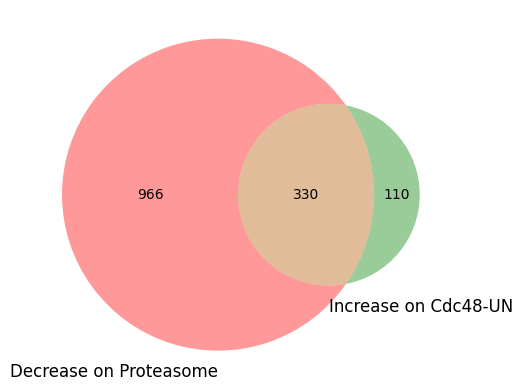

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (1296-330, 440-330, 330), set_labels = ('Decrease on Proteasome', 'Increase on Cdc48-UN'))
plt.savefig('venn.svg',transparent=True, format='svg')